In [6]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data # features, 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
y = iris.target # label, 'setosa' 'versicolor' 'virginica'

#For convenience’s sake, we convert this problem into 
#Binary Classification Problem by relabeling iris dataset — 1: Setosa, 0: not Setosa.
re_y = np.array([1 if i==0 else 0 for i in y]) # relabel, 'setosa':1, 'not setosa':0

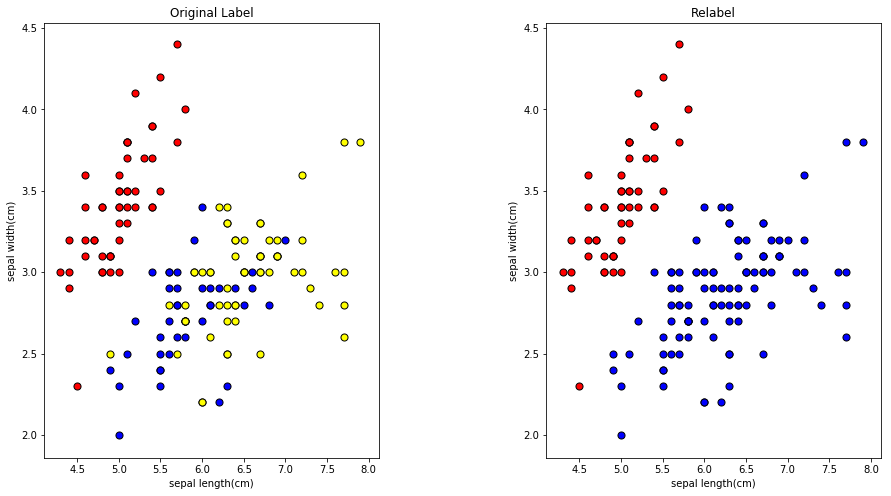

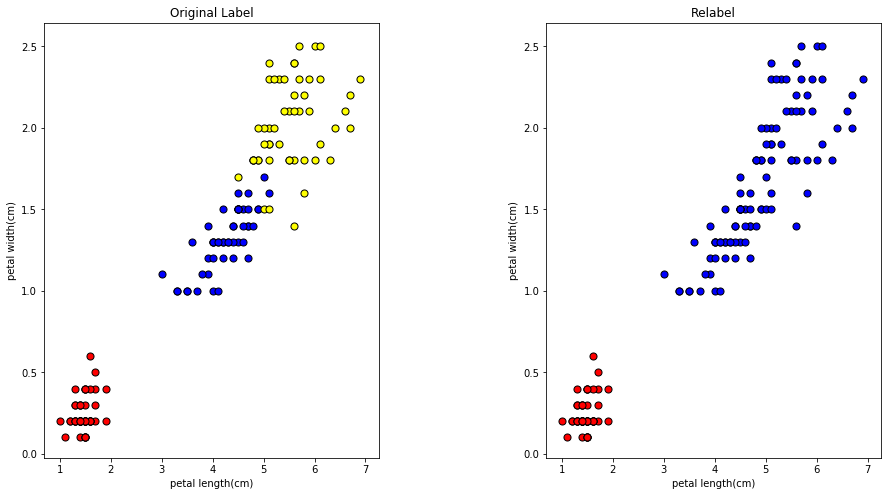

In [7]:
import matplotlib.pyplot as plt

def plot(xfeature_name, yfeature_name, xfeature, yfeature, ori_label, re_label):
    # setting color
    ori_color = {0: 'red', 1: 'blue', 2: 'yellow'} # label, 0:'setosa' 1:'versicolor' 2:'virginica'
    relbl_color = {0: 'blue', 1: 'red'} # relabel, 0:'not setosa' 1:'setosa'
    # plot oringinal label figure
    plt.figure(figsize=(15,8))
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace = 0.5)
    plt.title("Original Label")
    plt.xlabel(xfeature_name)
    plt.ylabel(yfeature_name)
    for i, j, color in zip(xfeature, yfeature, ori_label):
        plt.scatter(i, j, c=ori_color[color], marker='o', s=50, edgecolor='k',cmap=plt.cm.Spectral)
    # plot relabel figure
    plt.subplot(1, 2, 2)
    plt.title("Relabel")
    plt.xlabel(xfeature_name)
    plt.ylabel(yfeature_name)
    for i, j, color in zip(xfeature, yfeature, re_label):
        plt.scatter(i, j, c=relbl_color[color], marker='o', s=50, edgecolor='k',cmap=plt.cm.Spectral)

plot('sepal length(cm)', 'sepal width(cm)', X[:, 0], X[:, 1], y, re_y)
plot('petal length(cm)', 'petal width(cm)', X[:, 2], X[:, 3], y, re_y)
plt.show()

In [8]:
class my_NN(object):
    def __init__(self):
        # initialize input, output, hidden units
        self.input_units = 4 # feature numbers
        self.output_units = 1 # class number
        self.hidden_units = 6 # single layer
        
        # initialize random values for weight matrix
        np.random.seed(1)
        
        # weight1: input -> hidden layer
        self.w1 = np.random.randn(self.input_units, self.hidden_units) #input x hidden matrix = 4x6
        
        # weight2: hidden layer -> output layer
        self.w2 = np.random.randn(self.hidden_units, self.output_units) #hidden x output matrux = 6x1
        
    def _forward_propagation(self, X):
        self.z2 = np.dot(self.w1.T, X.T)
        self.a2 = self._sigmoid(self.z2)
        self.z3 = np.dot(self.w2.T, self.a2)
        self.a3 = self._sigmoid(self.z3)
        return self.a3
        
    def _sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def _loss(self, predict, y):
        m = y.shape[0]
        loss = (-1/m) * np.sum((np.log(predict) * y) + np.log(1 - predict) * (1 - y))
        return loss

    # Compute the Partial Derivative of J(Θ).
    def _backward_propagation(self, X, y):
        predict = self._forward_propagation(X) 
        m = X.shape[0]
        delta3 = predict - y # 1x150
        dz3 = np.multiply(delta3, self._sigmoid_prime(self.z3))
        self.dw2 = (1/m)*np.dot(dz3, self.a2.T).reshape(self.w2.shape)

        delta2 = delta2 = delta3*clr.w2*self._sigmoid_prime(self.z2)
        self.dw1 = (1/m)*np.dot(delta2, X).reshape(self.w1.shape)
    
    def _sigmoid_prime(self, z):
        return self._sigmoid(z) * (1 - self._sigmoid(z))
    
    # Update the weighting matrix W¹ and W² with the result of the Partial Derivative of J(Θ).
    def _update(self, learning_rate=1.9):
        self.w1 = self.w1 - learning_rate*self.dw1
        self.w2 = self.w2 - learning_rate*self.dw2
        
    def train(self, X, y, iteration=60):
        for i in range(iteration):
            # compute forward prop (y_hat)
            y_hat = self._forward_propagation(X)
            # return loss
            loss = self._loss(y_hat, y)
            # compute back prop
            self._backward_propagation(X, y)
            # update weights
            self._update()
            if i % 10 == 0:
                print("loss: ", loss)
        
    def predict(self, X):
        # compute forward prop again with newly updated weights (y_hat)
        # set y_hat as either 1 or 0 depending on >0.5 or <0.5
        y_hat = self._forward_propagation(X)
        y_hat = [1 if i[0] >= 0.5 else 0 for i in y_hat.T]
        return np.array(y_hat)
        
    def score(self, predict, y):
        # compute accuracy of prediction model
        cnt = np.sum(predict==y)
        return (cnt/len(y))*100

In [9]:
from sklearn.model_selection import train_test_split
if __name__=='__main__':
    train_X, test_X, train_y, test_y = train_test_split(X, re_y, test_size=0.25) # split training data and testing data
    clr = my_NN() #initialize the model
    clr.train(train_X, train_y) # train model
    pre_y = clr.predict(test_X) # predict
    score = clr.score(pre_y, test_y) # get the accuracy score
    
    print(np.stack([pre_y, test_y], axis=1))
    print('The above two columns you get should be very similar.')
    print('(Left-Your Numerical Gradient, Right-Analytical Gradient)\n')
    print('score: ', score)

loss:  0.834408870525
loss:  0.559753890926
loss:  0.539237580581
loss:  0.524648790651
loss:  0.511476115286
loss:  0.491276150872
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]
The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

score:  97.3684210526


In [33]:
print('z2 :', clr.z2.shape)
print('a2 :', clr.a2.shape)
print('z3 :', clr.z3.shape)
print('a3 :', clr.a3.shape)


z2 : (6, 112)
a2 : (6, 112)
z3 : (1, 112)
a3 : (1, 112)


In [34]:
print('w1 :', clr.w1.shape)
print('w2 :', clr.w2.shape)

w1 : (4, 6)
w2 : (6, 1)


In [35]:
print('train_X :', train_X.shape)
print('test_X :', test_X.shape)
print('train_y :', train_y.shape)
print('test_y :', test_y.shape)

train_X : (112, 4)
test_X : (38, 4)
train_y : (112,)
test_y : (38,)
